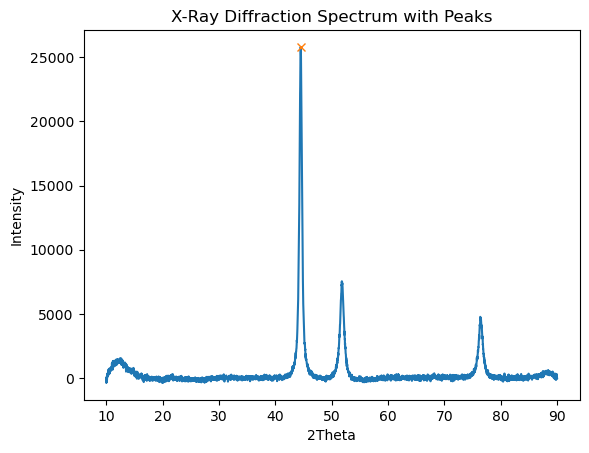

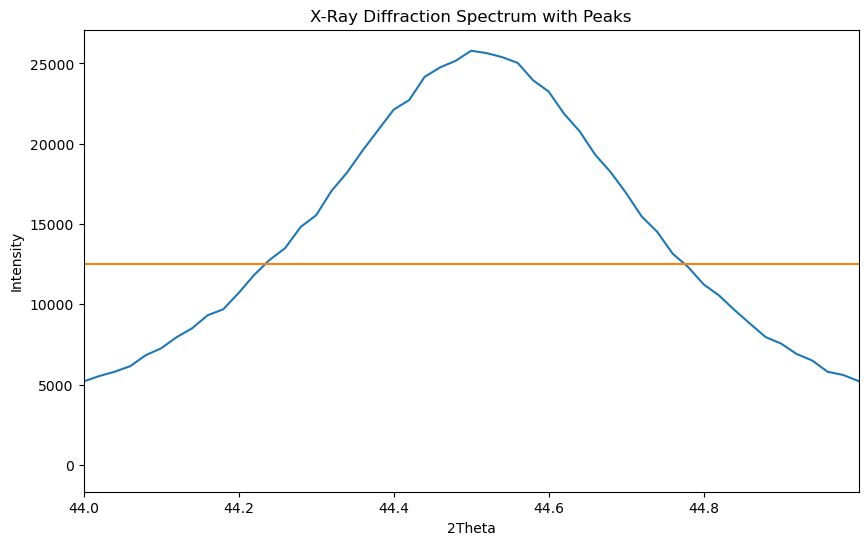

Peak at 2Theta = 44.5000 degrees
  - FWHM = 0.6386 degrees
  - Crystallite size = 2.38 nm



In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

# Função gaussiana
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Função para calcular o FWHM a partir do sigma da gaussiana
def calculate_fwhm(sigma):
    return 2 * np.sqrt(2 * np.log(2)) * sigma

# Função para calcular o tamanho do cristalito usando a equação de Scherrer com correção instrumental
def scherrer_equation(fwhm, theta, instrumental_fwhm=0.1):
    K = 0.9  # Fator de forma
    wavelength = 1.5406  # Comprimento de onda dos raios-X em Angstroms (Cu K-alpha)
    theta_rad = np.radians(theta / 2)
    corrected_fwhm = np.sqrt(fwhm**2 - instrumental_fwhm**2)
    return (K * wavelength) / (corrected_fwhm * np.cos(theta_rad))

# Carregar os dados do arquivo .txt
data = pd.read_csv('dataa.txt', sep="\s+", header=None)
data.columns = ['2Theta', 'Intensity']

# Identificar picos no espectro
peaks, _ = find_peaks(data['Intensity'], height=10000)  # Ajuste o parâmetro height conforme necessário

# Plotar o espectro com os picos identificados
plt.plot(data['2Theta'], data['Intensity'])
plt.plot(data['2Theta'][peaks], data['Intensity'][peaks], "x")
plt.xlabel('2Theta')
plt.ylabel('Intensity')
plt.title('X-Ray Diffraction Spectrum with Peaks')
plt.show()

plt.figure(figsize=[10,6])
plt.xlim(44,45)
plt.xticks(np.arange(44, 45, 0.2))  # Defina os intervalos x e valores
plt.plot(data['2Theta'], data['Intensity'])
plt.plot(data['2Theta'],np.zeros(len(data['2Theta']))+12500)
plt.xlabel('2Theta')
plt.ylabel('Intensity')
plt.title('X-Ray Diffraction Spectrum with Peaks')
plt.show()

# Lista para armazenar os tamanhos dos cristalitos
crystallite_sizes = []

# Ajustar uma gaussiana a cada pico e calcular o FWHM
for peak in peaks:
    # Pegar um intervalo de dados ao redor do pico para o ajuste
    peak_region = data[(data['2Theta'] > data['2Theta'][peak] - 1) & (data['2Theta'] < data['2Theta'][peak] + 1)]
    
    # Estimar parâmetros iniciais para o ajuste gaussiano
    p0 = [data['Intensity'][peak], data['2Theta'][peak], 0.1]  # [amplitude, centro, largura inicial]

    # Realizar o ajuste gaussiano
    try:
        popt, _ = curve_fit(gaussian, peak_region['2Theta'], peak_region['Intensity'], p0=p0)
        
        # Calcular o FWHM a partir do sigma ajustado
        sigma = popt[2]
        fwhm = calculate_fwhm(sigma)
        
        # Calcular o tamanho do cristalito usando a equação de Scherrer com correção instrumental
        theta = data['2Theta'][peak]
        size = scherrer_equation(fwhm, theta, instrumental_fwhm=0.1)  # Supondo instrumental_fwhm=0.1
        
        # Guardar o tamanho do cristalito na lista
        crystallite_sizes.append(size)
        
        # Exibir os resultados para cada pico
        print(f"Peak at 2Theta = {theta:.4f} degrees")
        print(f"  - FWHM = {fwhm:.4f} degrees")
        print(f"  - Crystallite size = {size:.2f} nm\n")
    except RuntimeError:
        print(f"Peak at 2Theta = {data['2Theta'][peak]:.4f} could not be fitted.")

